In [1]:
import torch
import torchvision
from torch import nn
import torch.nn.functional as F
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

from PIL import Image
import os

In [2]:
class ImagesDataset(Dataset):
    def __init__(self, root_dir):
        self.root_dir = root_dir
        self.img_names = os.listdir(root_dir)
        
    def __getitem__(self, index):
        img = Image.open(self.root_dir + '/' + self.img_names[index]).convert('L')
        item = transforms.ToTensor()(img)
        img.close()
        return item.reshape(64 * 64)

    def __len__(self):
        return len(self.img_names)

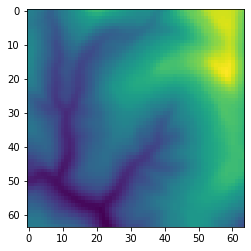

In [4]:
import matplotlib.pyplot as plt

dataset = ImagesDataset('./data')
plt.imshow(dataset[400].view(64, 64))
plt.show()

In [5]:
dataloader = DataLoader(dataset, batch_size=50, shuffle=True)

In [25]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        
        # Encoder specification
        self.enc_linear_1 = nn.Linear(64 * 64, 1024)
        self.enc_linear_2 = nn.Linear(1024, 512)
        self.enc_linear_3 = nn.Linear(512, 64)
        
        # Decoder specification
        self.dec_linear_1 = nn.Linear(64, 512)
        self.dec_linear_2 = nn.Linear(512, 1024)
        self.dec_linear_3 = nn.Linear(1024, 64 * 64)
        
    def encode(self, data):
        code = F.relu(self.enc_linear_1(data))
        code = F.relu(self.enc_linear_2(code))
        code = self.enc_linear_3(code)
        return code
        
    def decode(self, code):
        out = F.relu(self.dec_linear_1(code))
        out = F.relu(self.dec_linear_2(out))
        out = torch.sigmoid(self.dec_linear_3(out))
        return out
        
    def forward(self, data):
        code = self.encode(data)
        out = self.decode(code)
        return out

In [26]:
net = Autoencoder().cuda()

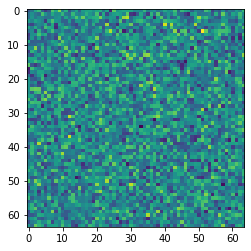

In [27]:
x = dataset[400].cuda()
output = net(x)
plt.imshow(output.cpu().view(64, 64).detach().numpy())
plt.show()

In [10]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.0001)

epochs = 1000

for epoch in range(epochs):
    for data in dataloader:
        net.zero_grad()
        x = data.cuda()
        output = net(x)
        loss = nn.MSELoss()(output, x)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.0025, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0030, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0014, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0004, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0004, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0004, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0004, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0003, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0003, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0004, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(8.7941e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(8.8883e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(6.6566e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(9.7150e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(4.6707e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(7.0689e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(6.4730e-05, device='cuda:

tensor(6.1080e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(7.3997e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(7.3311e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(5.9800e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(8.9678e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(9.3275e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(6.5141e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(8.3133e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(6.3547e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(6.2666e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(5.3459e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(8.0457e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(8.5337e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(8.8914e-05, device='cuda:0', grad_fn=<MseLossBackward>)


tensor(7.9925e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(6.6474e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(4.9991e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(6.7087e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(5.4051e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(7.2517e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(5.8826e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(4.9551e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(9.9073e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(5.8656e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(8.1051e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(7.186

tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(4.8686e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(6.4159e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(7.8170e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(7.1042e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(8.4792e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(5.4752e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(3.2643e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(6.8192e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(4.5515e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(8.3633e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(6.3243e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(6.5189e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(4.2562e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tens

tensor(7.9610e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(7.7876e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(8.4150e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(5.3486e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(7.0771e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(6.1112e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(6.2624e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(6.3874e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(8.2223e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(9.0803e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(7.5154e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(5.6686e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(7.0791e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(4.5006e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(5.4390e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(5.9082e-05, device='cuda:0', grad_fn=<MseLossBac

tensor(6.1378e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(5.5933e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(6.2953e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(7.6678e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(6.8211e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(6.8517e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(8.0268e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(5.5373e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(4.5766e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(7.9884e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(3.4891e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(7.1622e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(4.4580e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(7.1216e-05, device='cuda:0', grad_fn=<MseLossBackward>)


tensor(7.8838e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(5.9290e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(4.6652e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(9.3484e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(4.7605e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(4.8504e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(4.0778e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(9.3700e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(6.2170e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(7.2468e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(5.7061e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(4.9489e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(7.6066e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(4.6459e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(4.9774e-05, device='cuda:0', grad_fn=<MseLossBackwar

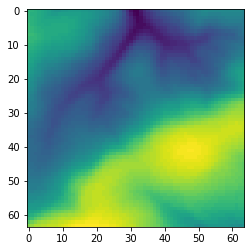

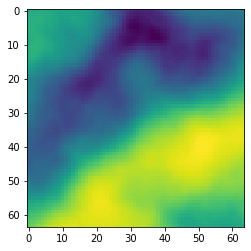

In [29]:
x = dataset[500].cuda()
plt.imshow(x.view(64, 64).cpu())
plt.show()
output = net(x)
plt.imshow(output.view(64, 64).cpu().detach().numpy())
plt.show()

In [14]:
#torch.save(net.state_dict(), './simple_autoencoder_save')

In [28]:
net.load_state_dict(torch.load('./simple_autoencoder_save'))

<All keys matched successfully>

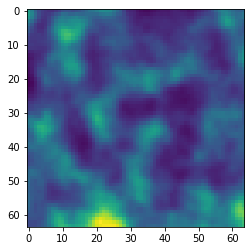

tensor([0.1208, 0.3644, 0.6189, 0.1531, 0.4470, 0.9825, 0.9710, 0.5317, 0.5451,
        0.5428, 0.6891, 0.9654, 0.7397, 0.9243, 0.6626, 0.3000, 0.7295, 0.1855,
        0.9956, 0.0924, 0.3040, 0.2087, 0.6441, 0.5683, 0.6797, 0.3869, 0.4250,
        0.4528, 0.1024, 0.7741, 0.6135, 0.1471, 0.3595, 0.2098, 0.4379, 0.9957,
        0.5279, 0.5674, 0.8183, 0.6696, 0.7016, 0.4229, 0.8181, 0.4037, 0.2700,
        0.6181, 0.8376, 0.6650, 0.6489, 0.8631, 0.1743, 0.6620, 0.1059, 0.4850,
        0.1734, 0.9020, 0.9158, 0.5554, 0.5239, 0.4345, 0.7775, 0.3318, 0.4401,
        0.9926], device='cuda:0')


In [38]:
# Generator
code = torch.rand(64).cuda()
output = net.decode(code)
plt.imshow(output.view(64, 64).cpu().detach().numpy())
plt.show()
print(code)